<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/01_Audio_Signal_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sampling Rate: 22050Hz, Data Length: 117601 samples


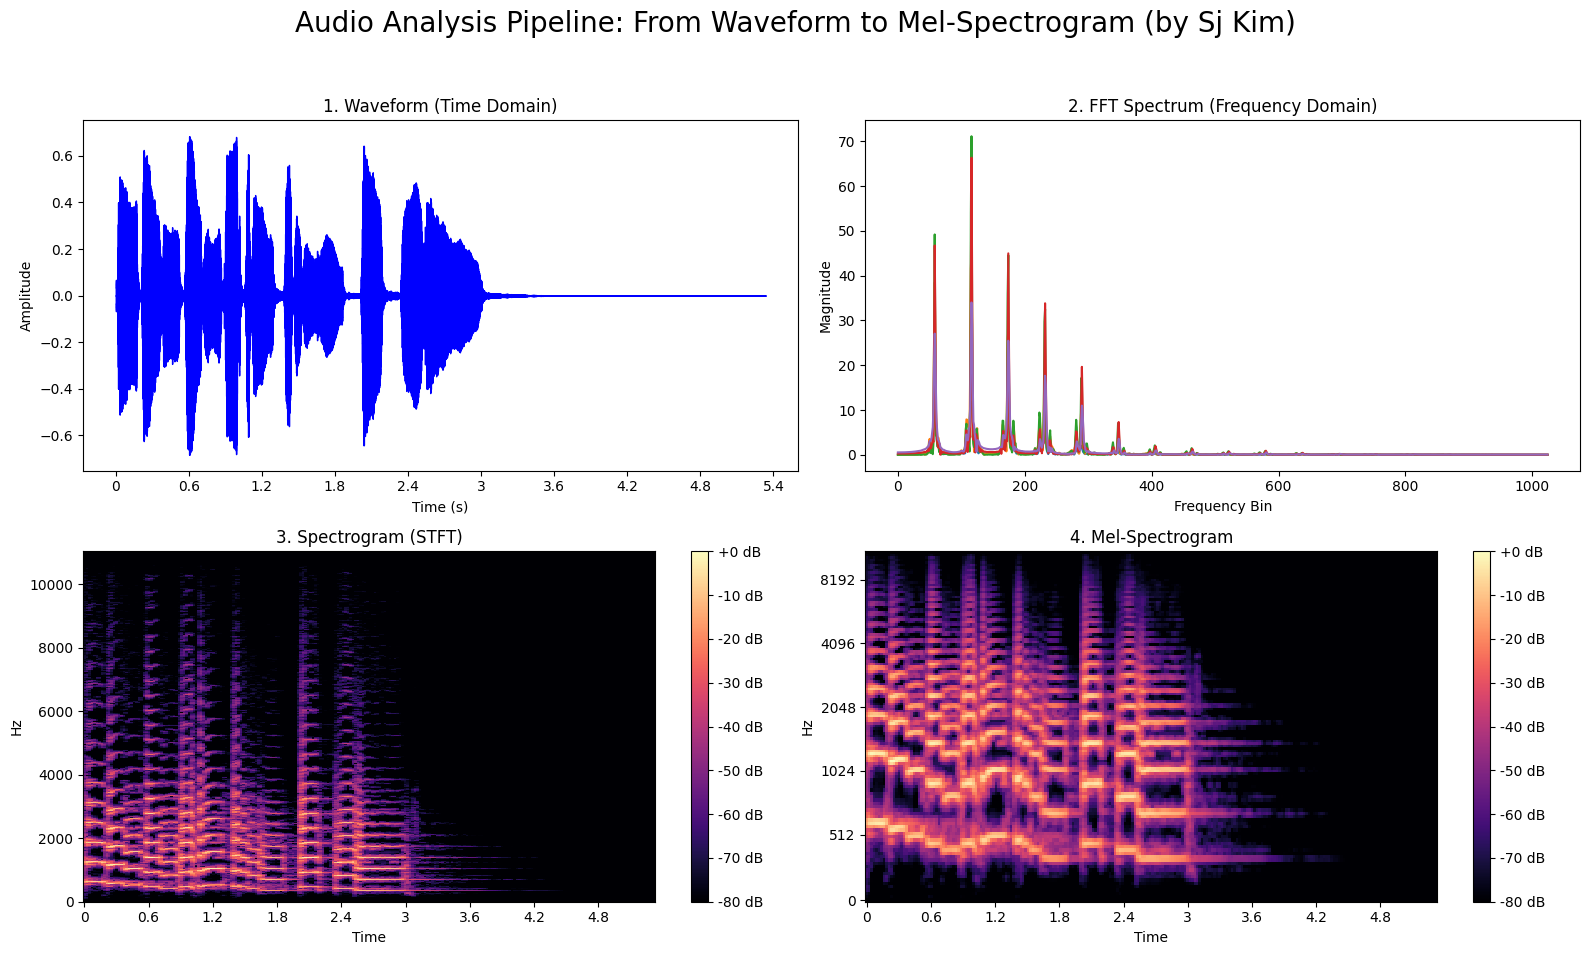

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# 1. 데이터 로드
y, sr = librosa.load(librosa.ex('trumpet'))
print(f"Sampling Rate: {sr}Hz, Data Length: {len(y)} samples")

# 시각화를 위한 전체 피규어 설정 (2행 2열)
plt.figure(figsize=(16, 10))
plt.suptitle('Audio Analysis Pipeline: From Waveform to Mel-Spectrogram (by Sj Kim)', fontsize=20)

# --- STEP 1: Time Domain (Waveform) ---
# 이유: 신호의 전체적인 크기 변화(Envelope)와 지속 시간을 파악하기 위해.
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr, color='blue')
plt.title('1. Waveform (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# --- STEP 2: Frequency Domain (Power Spectrum) ---
# 이유: '어떤 주파수(음높이)' 성분들이 소리에 포함되어 있는지 정적으로 확인하기 위해.
# 트럼펫의 배음(Harmonics) 구조 확인.
plt.subplot(2, 2, 2)
# 전체 신호 중 중간 부분의 1프레임만 FFT 수행
n_fft = 2048
D = np.abs(librosa.stft(y[:n_fft]))
plt.plot(D)
plt.title('2. FFT Spectrum (Frequency Domain)')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')

# --- STEP 3: Time-Frequency Domain (Spectrogram) ---
# 이유: 소리는 시간에 따라 주파수가 변함.
# STFT를 통해 '언제, 어떤 주파수가 강해지는지' 흐름을 파악하기 위해.
plt.subplot(2, 2, 3)
stft_result = librosa.stft(y)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max) # 로그 스케일 변환(dB)
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('3. Spectrogram (STFT)')

# --- STEP 4: Human Perception Domain (Mel-Spectrogram) ---
# 이유: 인간의 귀는 저주파 대역은 예민하게, 고주파 대역은 둔감하게 반응함.
# 이 특성을 반영하여 기계학습/AI 모델이 학습하기 가장 좋은 형태로 변환하기 위해.
plt.subplot(2, 2, 4)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('4. Mel-Spectrogram')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()